## Data augmentation with numpy
**Data Augmentation** are “Techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.” 

-> Data Augmentation is about making minimal changes to existing data to create new  representative data.

-> **Why? :** improve performance and outcomes of machine learning models by forming new and different examples to train datasets. If dataset in a machine learning model is rich and sufficient, the model performs better and more accurate.

**Importing the necessary Libraries**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# The first part : 
Import our source images using pillow library, then tranforming them to an array

The Type of the image is: <class 'numpy.ndarray'>
The Shape of the image is: (635, 640, 3)


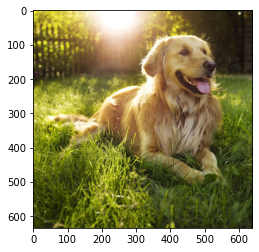

In [58]:
im = Image.open("dog.jpg") # To read the image 
image = np.array(im) # Converting our original image to an array

#print(image)
print('The Type of the image is:',type(image))
print('The Shape of the image is:',image.shape)

#showing our original image using matplotlib library
plt.imshow(image)
plt.show()

# Functions 

**10 Transformation Techniques** : 

random rotating, vertical flipping, horizontal flipping, translation along x, translation along y, cropping, zooming, color modification, adding light gaussian noise, adding illumination.

In [240]:
def random_rotating(src_img):
    rot_img = np.rot90(src_img,np.random.randint(1,4))
    return rot_img

**To flip a matrix horizontally means reversing each row of the matrix.**

For example :

1 2 3
4 5 6
7 8 9

would be represented as [[1, 2, 3], [4, 5, 6], [7, 8, 9]].

A horizonatal flip reflects each row. For instance, if we flip the previous matrix horizontally, we get

3 2 1
6 5 4
9 8 7

which would be represented as [[3, 2, 1], [6, 5, 4], [9, 8, 7]].



In [134]:
# Vertical Flipping
def vertical_flipping(src_img):
    im_V_flipp = np.array(list(reversed(src_img))) #reverse matrix
    return im_V_flipp

In [135]:
# Horizontal Flipping
def horizontal_flipping(src_img):
    im_H_flipp = np.array([list(reversed(row)) for row in src_img])
    return im_H_flipp

In [136]:
# Translation Along X
def translation_along_x(src_img,shift_dist,img_shape):
    height, width = src_img.shape[:2]
    x_dist=shift_dist[0]
    y_dist=shift_dist[1]
    img_final=np.zeros(src_img.shape, dtype="uint8")
    matrix_trans=np.array([[1,0,x_dist],[0,1,y_dist]])
    for i in range(height):
        for j in range(width):
            x_old=j
            y_old=i
            xy_old=np.array([x_old,y_old,1])
            xy=np.dot(matrix_trans,xy_old)
            x=xy[0]
            y=xy[1]
            
            if (0<x<width) and (0<y<height):
                img_final[y,x]=src_img[i,j]
    return img_final

In [137]:
# Translation Along Y
def translation_along_y(src_img,shift_dist,img_shape):
    height, width = src_img.shape[:2]
    x_dist=shift_dist[0]
    y_dist=shift_dist[1]
    img_final=np.zeros(src_img.shape, dtype="uint8")
    matrix_trans=np.array([[1,0,x_dist],[0,1,y_dist]])
    for i in range(height):
        for j in range(width):
            x_old=j
            y_old=i
            xy_old=np.array([x_old,y_old,1])
            xy=np.dot(matrix_trans,xy_old)
            x=xy[0]
            y=xy[1]
            
            if (0<x<width) and (0<y<height):
                img_final[y,x]=src_img[i,j]
    return img_final

In [138]:
#Zooming
def zoom(src_img, w_start,w_end, h_start,h_end):
    zoom_image = np.zeros(image.shape,image.dtype)
    zoom_image = src_img[w_start:w_end, h_start:h_end]
    return zoom_image

In [139]:
#Cropping
def crop(src_img, x, y, width, height):
    new_image = np.zeros(src_img.shape,src_img.dtype)
    new_image = src_img[y:y + height, x:x+width]
    return new_image

In [140]:
# Color Modification
def ColorModification(src_img):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
 
    for c, ax in zip(range(3), axs):
        rgb_img = np.zeros(src_img.shape, dtype="uint8")
        rgb_img[:,:,c] = src_img[:,:,c]
        ax.imshow(rgb_img)
        ax.set_axis_off()

In [141]:
# Adding Light Gaussian Noise
def lightGaussianNoise(src_img):
    f = src_img/255
    x,y,z= f.shape
    mean = 0
    var = 0.3
    sigma = np.sqrt(var)
    noise = np.random.normal(loc=mean, scale=sigma,size=(x,y,z))
    im_gauss_noise = f + noise
    return im_gauss_noise

In [142]:
# Adding Illumination
def addIllumination(src_img, contrast, bright):
    new_image = np.zeros(src_img.shape, image.dtype)
    for i in range(src_img.shape[0]):
          for j in range(src_img.shape[1]):
                for k in range(src_img.shape[2]):
                      new_image[i,j,k] = np.clip(contrast*src_img[i,j,k] + bright, 0, 255)  
    return new_image

# Dogs

In [143]:
Dog_path = r'C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Dog/*.jpg'
Dog_images = [plt.imread(image) for image in glob.glob(Dog_path)]

In [224]:
directory_save="C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Train_Images/Dog/"
directory_save_test="C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Test_Images/Dog/"
for i in range(len(Dog_images)):
        Image.fromarray(random_rotating(Dog_images[i]).astype(np.uint8)).save(directory_save+"Rotating_Image"+str(i)+".jpg",'JPEG')
        Image.fromarray(crop(Dog_images[i], 100, 300, 150, 400)).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(Dog_images[i],(50,0),Dog_images[i].shape)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(Dog_images[i],(50,0),Dog_images[i].shape)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray(lightGaussianNoise(Dog_images[i]).astype(np.uint8)).save(directory_save+"Noisy_Image"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(Dog_images[i],100,300,150,400)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG') 
        #Image.fromarray(ColorModification(Dog_images[i])).save(directory_save+"Image_colorModif"+str(i)+".jpg",'JPEG') 
        Image.fromarray(horizontal_flipping(Dog_images[i])).save(directory_save_test+"H_Flipping"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(Dog_images[i])).save(directory_save_test+"H_Flip_Flipping"+str(i)+".jpg",'JPEG')
        Image.fromarray(addIllumination(Dog_images[i],1,90)).save(directory_save_test+"Illuminated_Image"+str(i)+".jpg",'JPEG')

# Tree 

In [193]:
Tree_path = r'C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Tree/*.jpg'
Tree_images = [plt.imread(image) for image in glob.glob(Tree_path)]

In [223]:
directory_save="C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Train_Images/Tree/"
directory_save_test="C:/Users/MSI/M1_BDIA_Python pour Data Science/Data Augmentation Project/Test_Images/Tree/"
for i in range(len(Tree_images)):
        Image.fromarray(random_rotating(Tree_images[i]).astype(np.uint8)).save(directory_save+"Rotating_Image"+str(i)+".jpg",'JPEG')
        Image.fromarray(crop(Tree_images[i], 100, 300, 150, 400)).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(Tree_images[i],(50,0),Tree_images[i].shape)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(Tree_images[i],(50,0),Tree_images[i].shape)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray(lightGaussianNoise(Tree_images[i]).astype(np.uint8)).save(directory_save+"Noisy_Image"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(Tree_images[i],100,300,150,400)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG') 
        #Image.fromarray(ColorModification(Tree_images[i])).save(directory_save+"Image_colorModif"+str(i)+".jpg",'JPEG') 
        Image.fromarray(horizontal_flipping(Tree_images[i])).save(directory_save_test+"H_Flipping"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(Tree_images[i])).save(directory_save_test+"H_Flip_Flipping"+str(i)+".jpg",'JPEG')
        Image.fromarray(addIllumination(Tree_images[i],1,90)).save(directory_save_test+"Illuminated_Image"+str(i)+".jpg",'JPEG')

# Some Data Visualization

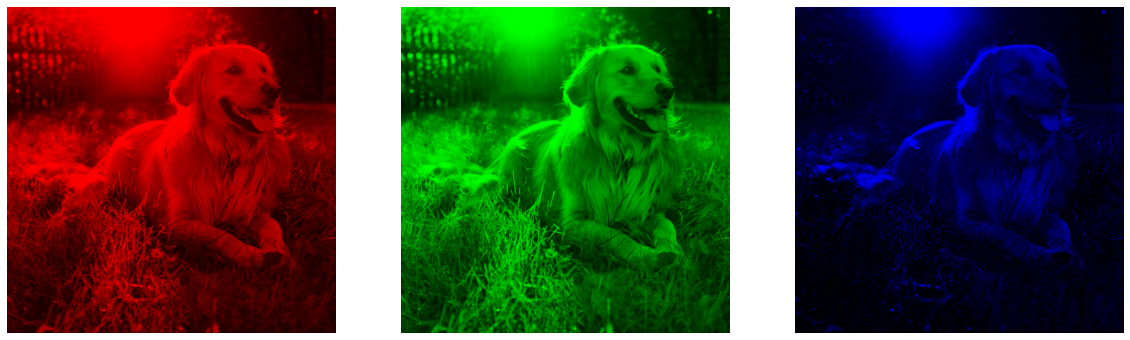

In [132]:
# Image 0 : Dog
ColorModification(Dog_images[0])
Illuminated_dog0 = addIllumination(Dog_images[0],1,90)
gussian_dog0 = lightGaussianNoise(Dog_images[0])
V_Flip_dog0 = vertical_flipping(Dog_images[0])
H_Flip_dog0 = horizontal_flipping(Dog_images[0])
translation_X_dog0 = translation_along_x(Dog_images[0],(50,0),Dog_images[0].shape)
translation_Y_dog0 = translation_along_y(Dog_images[0],(0,50),Dog_images[0].shape)
zoom_image_dog0 = zoom(Dog_images[0],233,500,150,400)
cropped_image_dog0 = crop(Dog_images[0], 250, 200, 450, 250) 

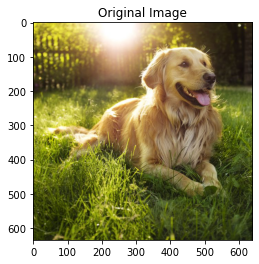

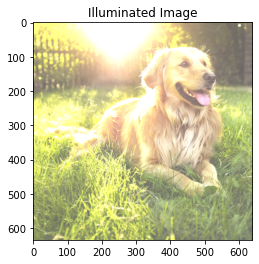

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


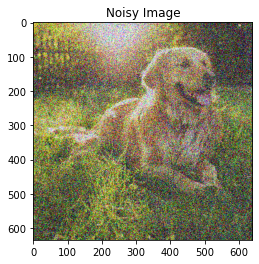

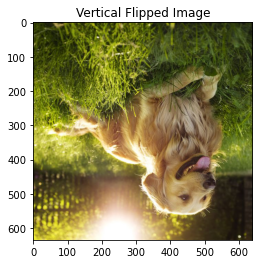

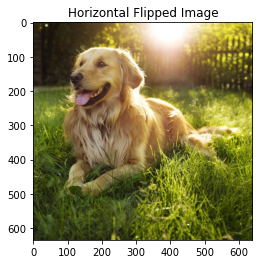

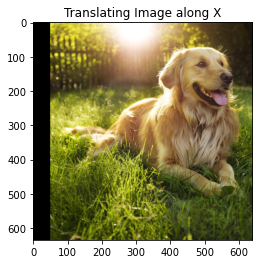

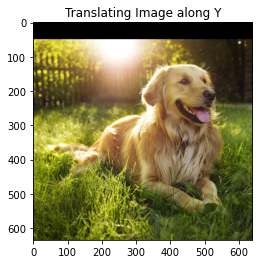

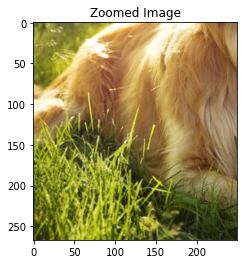

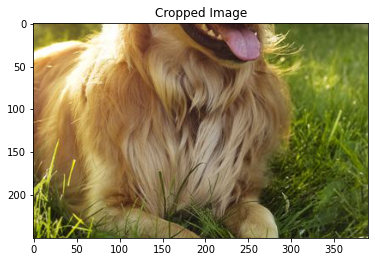

In [133]:
#Visalization Image 0 : Dog
plt.imshow(Dog_images[0])
plt.title("Original Image")
plt.show()

plt.imshow(Illuminated_dog0)
plt.title("Illuminated Image")
plt.show()


plt.imshow(gussian_dog0)
plt.title("Noisy Image")
plt.show()

plt.imshow(V_Flip_dog0)
plt.title("Vertical Flipped Image")
plt.show()


plt.imshow(H_Flip_dog0)
plt.title("Horizontal Flipped Image")
plt.show()


plt.imshow(translation_X_dog0)
plt.title("Translating Image along X")
plt.show()


plt.imshow(translation_Y_dog0)
plt.title("Translating Image along Y")
plt.show()


plt.imshow(zoom_image_dog0)
plt.title("Zoomed Image")
plt.show()


plt.imshow(cropped_image_dog0)
plt.title("Cropped Image")
plt.show()

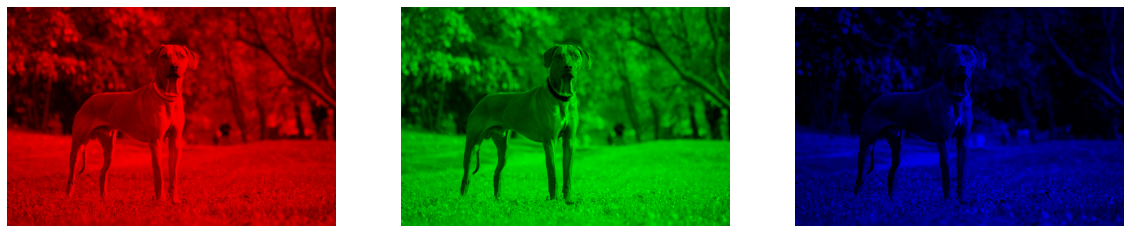

In [128]:
# Image 1 : Dog
ColorModification(Dog_images[1])
Illuminated_dog1 = addIllumination(Dog_images[1],1,90)
gussian_dog1 = lightGaussianNoise(Dog_images[1])
V_Flip_dog1 = vertical_flipping(Dog_images[1])
H_Flip_dog1 = horizontal_flipping(Dog_images[1])
translation_X_dog1 = translation_along_x(Dog_images[1],(50,0),Dog_images[1].shape)
translation_Y_dog1 = translation_along_y(Dog_images[1],(0,50),Dog_images[1].shape)
zoom_image_dog1 = zoom(Dog_images[1],233,500,150,400)
cropped_image_dog1 = crop(Dog_images[1], 250, 200, 450, 250) 

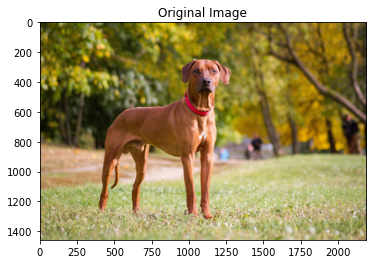

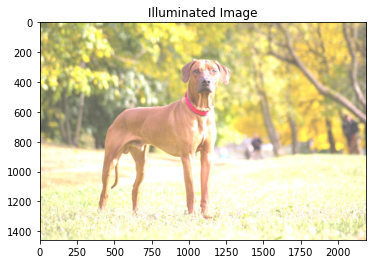

TypeError: Invalid shape (9565938,) for image data

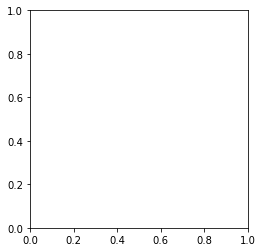

In [251]:
#Visalization Image 1 : Dog
plt.imshow(Dog_images[1])
plt.title("Original Image")
plt.show()

plt.imshow(Illuminated_dog1)
plt.title("Illuminated Image")
plt.show()


plt.imshow(gussian_dog1)
plt.title("Noisy Image")
plt.show()

plt.imshow(V_Flip_dog1)
plt.title("Vertical Flipped Image")
plt.show()


plt.imshow(H_Flip_dog1)
plt.title("Horizontal Flipped Image")
plt.show()


plt.imshow(translation_X_dog1)
plt.title("Translating Image along X")
plt.show()


plt.imshow(translation_Y_dog1)
plt.title("Translating Image along Y")
plt.show()


plt.imshow(zoom_image_dog1)
plt.title("Zoomed Image")
plt.show()


plt.imshow(cropped_image_dog1)
plt.title("Cropped Image")
plt.show()

In [ ]:
# Image 2 : Dog
ColorModification(Dog_images[2])
Illuminated_dog2 = addIllumination(Dog_images[2],1,90)
gussian_dog2 = lightGaussianNoise(Dog_images[2])
V_Flip_dog2 = vertical_flipping(Dog_images[2])
H_Flip_dog2 = horizontal_flipping(Dog_images[2])
translation_X_dog2 = translation_along_x(Dog_images[2],(50,0),Dog_images[2].shape)
translation_Y_dog2 = translation_along_y(Dog_images[2],(0,50),Dog_images[2].shape)
zoom_image_dog2 = zoom(Dog_images[2],233,500,150,400)
cropped_image_dog2 = crop(Dog_images[2], 250, 200, 450, 250) 

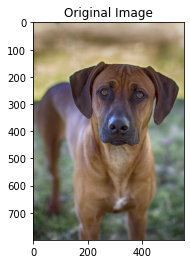

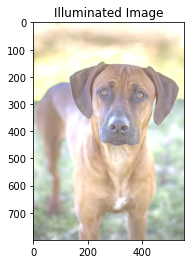

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


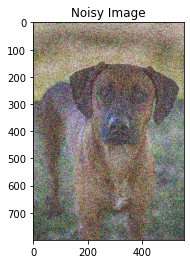

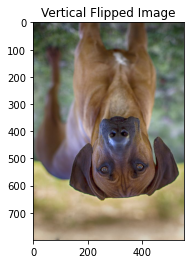

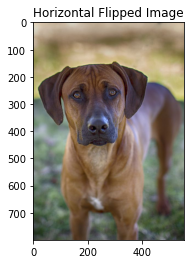

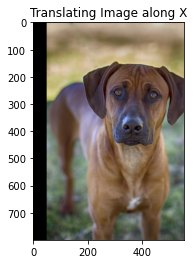

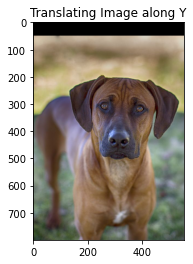

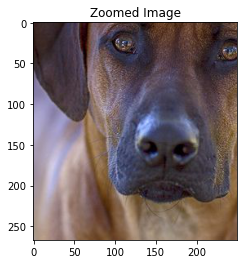

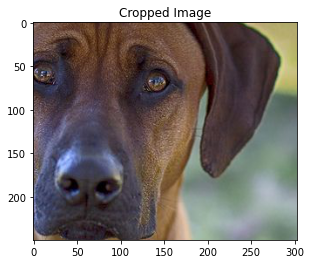

In [131]:
#Visalization Image 2 : Dog
plt.imshow(Dog_images[2])
plt.title("Original Image")
plt.show()

plt.imshow(Illuminated_dog2)
plt.title("Illuminated Image")
plt.show()


plt.imshow(gussian_dog2)
plt.title("Noisy Image")
plt.show()

plt.imshow(V_Flip_dog2)
plt.title("Vertical Flipped Image")
plt.show()


plt.imshow(H_Flip_dog2)
plt.title("Horizontal Flipped Image")
plt.show()


plt.imshow(translation_X_dog2)
plt.title("Translating Image along X")
plt.show()


plt.imshow(translation_Y_dog2)
plt.title("Translating Image along Y")
plt.show()


plt.imshow(zoom_image_dog2)
plt.title("Zoomed Image")
plt.show()


plt.imshow(cropped_image_dog2)
plt.title("Cropped Image")
plt.show()

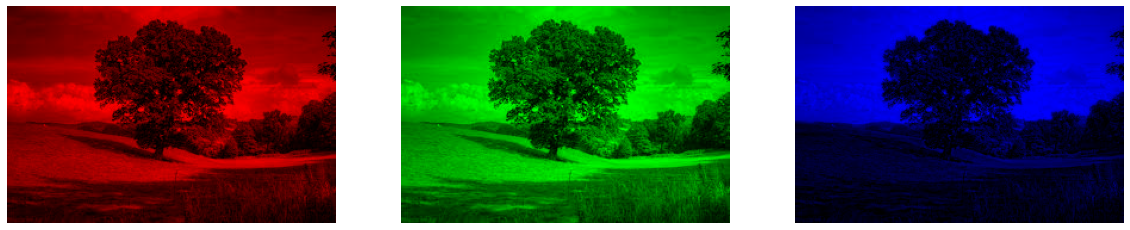

In [158]:
# Image 0 : Tree
ColorModification(Tree_images[0])
Illuminated_Tree0 = addIllumination(Tree_images[0],1,90)
gussian_Tree0 = lightGaussianNoise(Tree_images[0])
V_Flip_Tree0 = vertical_flipping(Tree_images[0])
H_Flip_Tree0 = horizontal_flipping(Tree_images[0])
translation_X_Tree0 = translation_along_x(Tree_images[0],(50,0),Tree_images[0].shape)
translation_Y_Tree0 = translation_along_y(Tree_images[0],(0,50),Tree_images[0].shape)
zoom_image_Tree0 = zoom(Tree_images[0],100,300,150,400)
cropped_image_Tree0 = crop(Tree_images[0], 100, 300, 150, 400) 

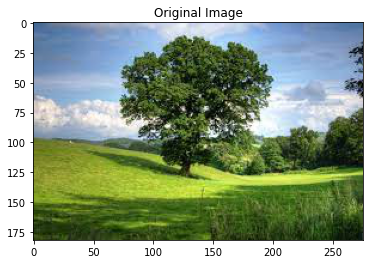

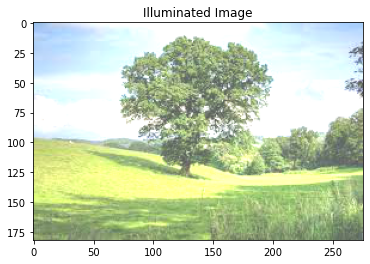

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


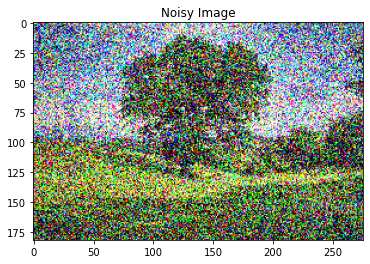

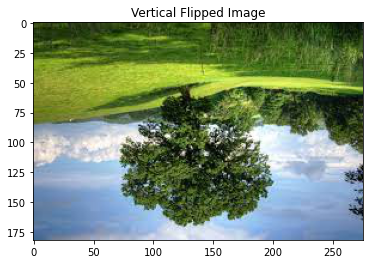

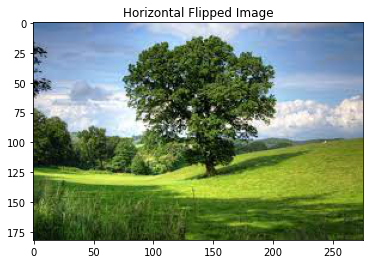

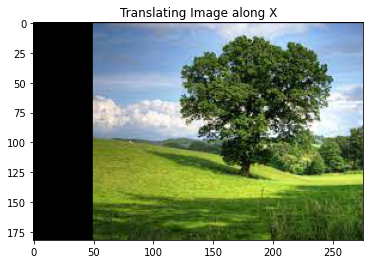

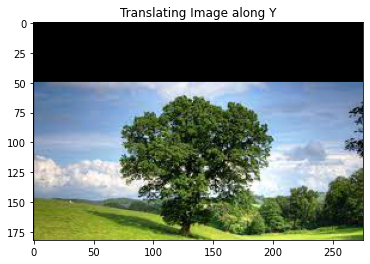

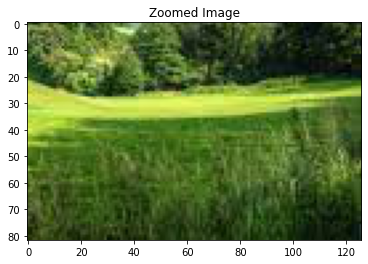

ValueError: zero-size array to reduction operation minimum which has no identity

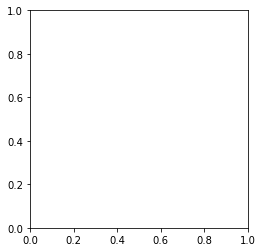

In [159]:
#Visalization Image 0 : Tree
plt.imshow(Tree_images[0])
plt.title("Original Image")
plt.show()

plt.imshow(Illuminated_Tree0)
plt.title("Illuminated Image")
plt.show()


plt.imshow(gussian_Tree0)
plt.title("Noisy Image")
plt.show()

plt.imshow(V_Flip_Tree0)
plt.title("Vertical Flipped Image")
plt.show()


plt.imshow(H_Flip_Tree0)
plt.title("Horizontal Flipped Image")
plt.show()


plt.imshow(translation_X_Tree0)
plt.title("Translating Image along X")
plt.show()


plt.imshow(translation_Y_Tree0)
plt.title("Translating Image along Y")
plt.show()


plt.imshow(zoom_image_Tree0)
plt.title("Zoomed Image")
plt.show()


plt.imshow(cropped_image_Tree0)
plt.title("Cropped Image")
plt.show()

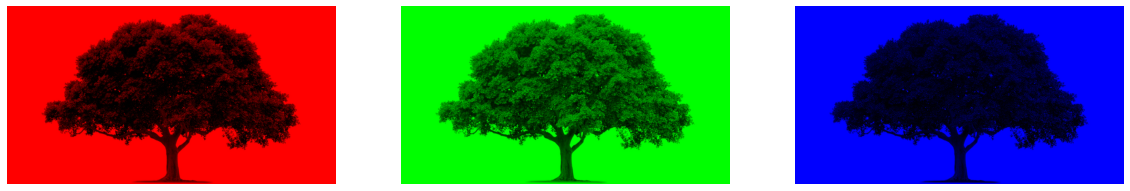

In [161]:
# Image 1 : Tree
ColorModification(Tree_images[1])
Illuminated_Tree1 = addIllumination(Tree_images[1],1,90)
gussian_Tree1 = lightGaussianNoise(Tree_images[1])
V_Flip_Tree1 = vertical_flipping(Tree_images[1])
H_Flip_Tree1 = horizontal_flipping(Tree_images[1])
translation_X_Tree1 = translation_along_x(Tree_images[1],(50,0),Tree_images[1].shape)
translation_Y_Tree1 = translation_along_y(Tree_images[1],(0,50),Tree_images[1].shape)
zoom_image_Tree1 = zoom(Tree_images[1],100,300,150,400)
cropped_image_Tree1 = crop(Tree_images[1], 100, 300, 150, 400) 

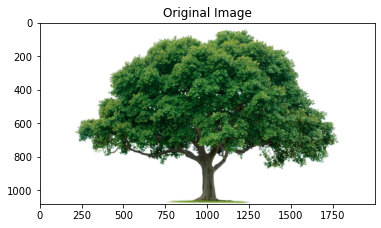

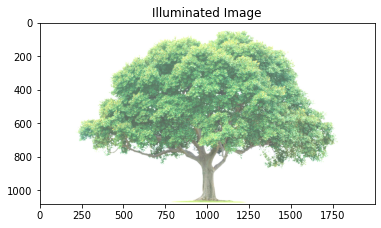

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


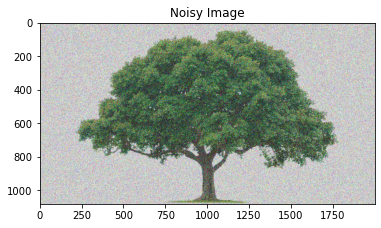

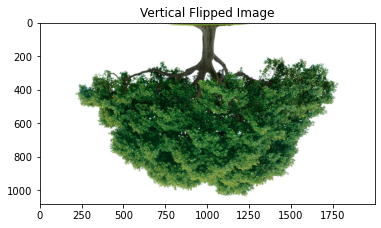

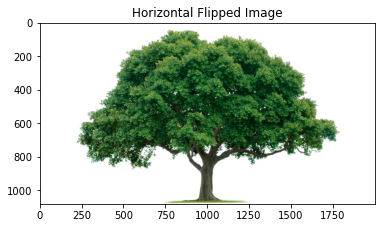

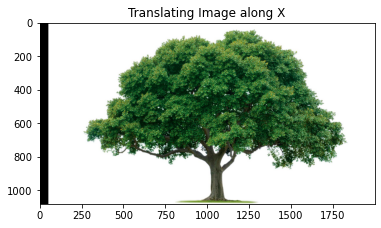

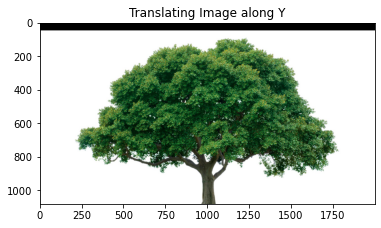

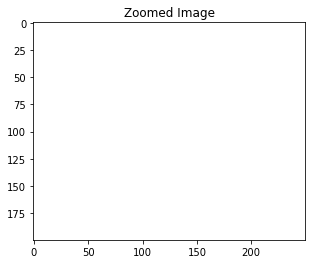

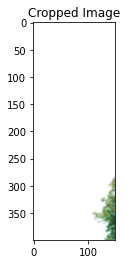

In [162]:
#Visalization Image 1 : Tree
plt.imshow(Tree_images[1])
plt.title("Original Image")
plt.show()

plt.imshow(Illuminated_Tree1)
plt.title("Illuminated Image")
plt.show()


plt.imshow(gussian_Tree1)
plt.title("Noisy Image")
plt.show()

plt.imshow(V_Flip_Tree1)
plt.title("Vertical Flipped Image")
plt.show()


plt.imshow(H_Flip_Tree1)
plt.title("Horizontal Flipped Image")
plt.show()


plt.imshow(translation_X_Tree1)
plt.title("Translating Image along X")
plt.show()


plt.imshow(translation_Y_Tree1)
plt.title("Translating Image along Y")
plt.show()


plt.imshow(zoom_image_Tree1)
plt.title("Zoomed Image")
plt.show()


plt.imshow(cropped_image_Tree1)
plt.title("Cropped Image")
plt.show()

# Histograms

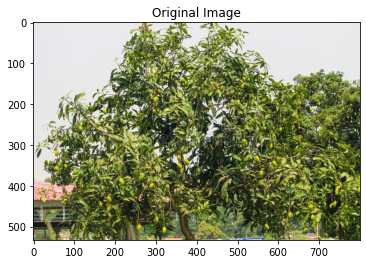

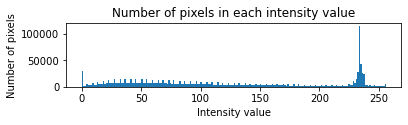

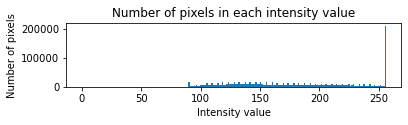

In [247]:
# One of tree images
plt.imshow(Tree_images[1])
plt.title("Original Image")
plt.show()

# Histogram for pixel intensity (Original Image)
plt.subplot(3,1,1)
img_flat = Tree_images[1].flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity value")
plt.ylabel("Number of pixels")
plt.show()

plt.subplot(3,1,3)
# Histogram for pixel intensity (Illuminated Image)
Illuminated_Tree1 =Illuminated_Tree1.flatten()
plt.hist(img_ill, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity value")
plt.ylabel("Number of pixels")
plt.show()

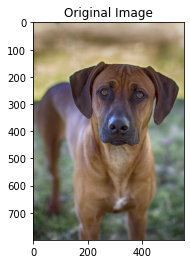

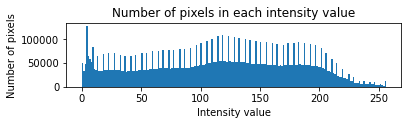

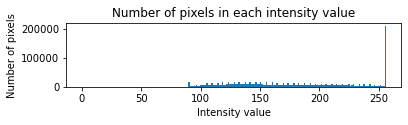

In [253]:
# One of Dog images
plt.imshow(Dog_images[2])
plt.title("Original Image")
plt.show()

# Histogram for pixel intensity (Original Image)
plt.subplot(3,1,1)
img_flat = Dog_images[1].flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity value")
plt.ylabel("Number of pixels")
plt.show()


plt.subplot(3,1,3)
# Histogram for pixel intensity (Gaussian Noise Image)
gussian_dog1 =gussian_dog1.flatten()
plt.hist(img_ill, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity value")
plt.ylabel("Number of pixels")
plt.show()

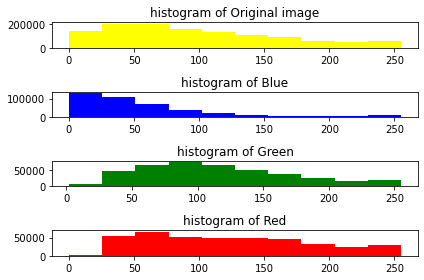

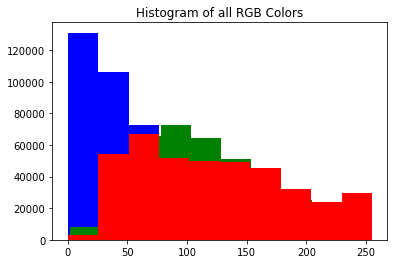

In [77]:
# Image Colors Histograms(RGB)
red_color = image[:,:,0]
green_color = image[:,:,1]
blue_color = image[:,:,2]

plt.subplot(4, 1, 1)
plt.title("histogram of Original image")
plt.hist(image.ravel(), color="yellow")

# Separate Histograms for each color
plt.subplot(4, 1, 2)
plt.title("histogram of Blue")
plt.hist(blue_color.ravel(), color="blue")

plt.subplot(4, 1, 3)
plt.title("histogram of Green")
plt.hist(green_color.ravel(), color="green")
 
plt.subplot(4, 1, 4)
plt.title("histogram of Red")
plt.hist(red_color.ravel(), color="red")
 
# for clear view
plt.tight_layout()
plt.show()
 
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color.ravel(), color="b")
plt.hist(green_color.ravel(), color="g")
plt.hist(red_color.ravel(), color="r")
plt.show()

In [254]:
def Visualize(im,im1):
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(im)
    ax[0][1].imshow(im1)
    ax[1][0].hist(im.ravel(),256,[0,256])
    ax[1][1].hist(im1.ravel(),256,[0,256])
    ax[0][0].set_ylabel('Original Image')
    ax[0][1].set_ylabel('Augmented Image')
    colors = ("red", "green", "blue")
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            im1[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.title("Color Histogram of the augmented image")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")

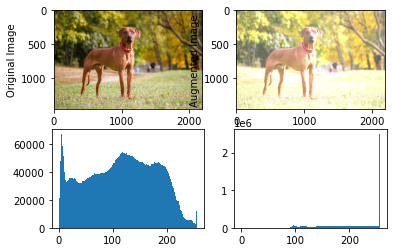

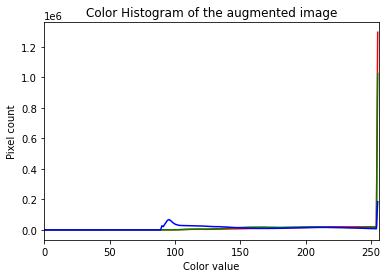

In [257]:
Visualize(Dog_images[1],Illuminated_dog1)

# Binary Classification